# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *{Daria Komissarova}*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

**Model A**
<br \>
Lets generate a network, satisfying model A.
Firstly, we take a random graph with n0 nodes and m0 edges. Then in every time step we add m random edges to existing nodes.

As we can see on the figure, pdf distribution has mean value close to 8, because in every step we add m=4 random edges. 

As we can see on the pdf and cdf, the network's degree distribution doesn't follows a power law (pdf and cdf don't look like power law distribution).  
We can see, that average degree decrease with the increesing nodes,that is obviouse. And the average degree also decline with age, because of when age is high(and number of degree too) the probability of choese one is low.

Model A


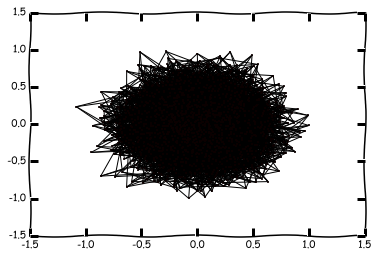

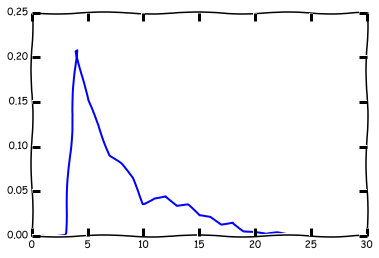

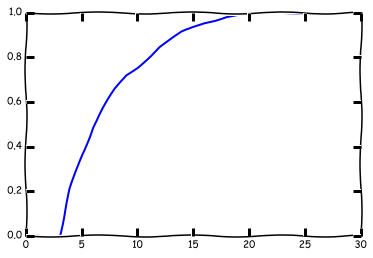

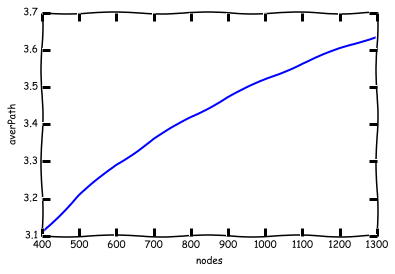

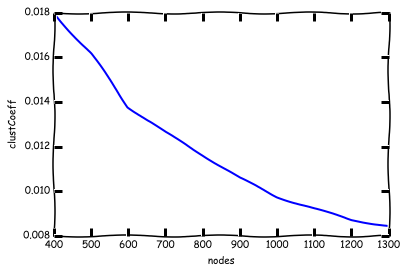

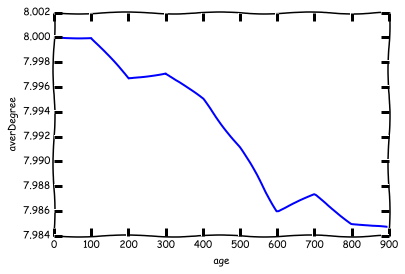

In [57]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import numpy.random as rnd
import networkx as nx
import random
import operator
%matplotlib inline

def estimate_pdf_cdf(G):
    nFin = len(G.nodes()) #количество вершин в графе итоговом
    degrees = list(G.degree().values())
    max_degree =  max(degrees)

    list_numOfEveryDegree = []
    pdf = []
    for i in range(1,max_degree+1):
        temp=0
        for j in xrange(nFin):
            if (degrees[j]==i):
                temp = temp+1
        list_numOfEveryDegree.append(temp)

    pdf = [float(i)/nFin for i in list_numOfEveryDegree]

    cdf = []
    cdf.append(pdf[0])
    for i in xrange(1,len(pdf)):
        cdf.append(cdf[-1]+pdf[i])
    
    return pdf, cdf


def estimate_parameters(G):
    degrees = list(G.degree().values())

    averPath = nx.average_shortest_path_length(G)
    clustCoeff = nx.transitivity(G)
    averDegree = float(sum(degrees)) / len(degrees)
    
    return averPath, clustCoeff, averDegree
 
    
#Модель А  
n0 = 400
tmax = 1000
m0 = 1600
m = 4
list_averPath = []
list_clustCoeff = []
list_averDegree = []

G = nx.gnm_random_graph(n0,m0)

for i in xrange(0,tmax):
    list_neigh = np.random.randint(G.nodes()[0], G.nodes()[-1], m)
    G.add_node(n0+i)
    for j in list_neigh:
        G.add_edge(n0+i,j)
    if (i%100 == 0):
        a,b,c = estimate_parameters(G)
        list_averPath.append(a)
        list_clustCoeff.append(b)
        list_averDegree.append(c)
        

plt.figure(1)
nx.draw_networkx(G,node_size = 1,with_labels = False)

pdf,cdf = estimate_pdf_cdf(G)
plt.figure(2)
plt.plot(xrange(1,len(pdf)+1), pdf)

plt.figure(3)
plt.plot(xrange(1,len(cdf)+1), cdf)


plt.figure(4)
plt.plot(xrange(n0,len(G),100), list_averPath)
plt.xlabel('nodes')
plt.ylabel('averPath')

plt.figure(5)
plt.plot(xrange(n0,len(G),100), list_clustCoeff)
plt.xlabel('nodes')
plt.ylabel('clustCoeff')

plt.figure(6)
plt.plot(xrange(0,tmax,100), list_averDegree)
plt.xlabel('age')
plt.ylabel('averDegree')

print('Model A')

**Model B**
<br \>
Lets generate a network, satisfying model B.
Firstly, we take a random graph with n0 nodes and m0 edges. Then we add additional edges.

As we can see on the figure, in pdf distribution overwellming majority of nodes has degree close to 20 (choosen in the beginnig). We select vertices with maximal probability.

As we can see on the pdf and cdf, the network's degree distribution doesn't follows a power law (pdf and cdf don't look like power law distribution).  
As we chose high m=20, then with every choosen node we add 20 edges, and in the initial network average degree is lowel, this index is growing.

Model B


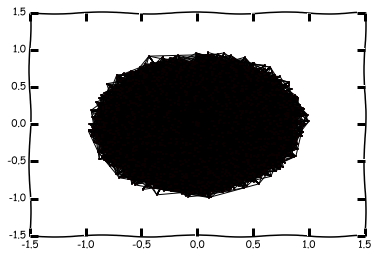

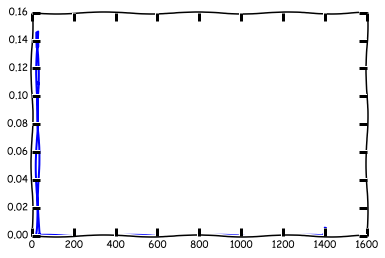

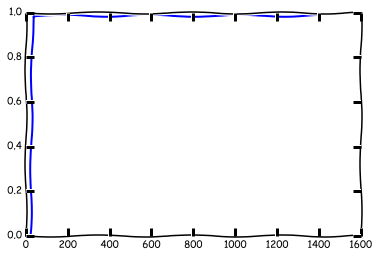

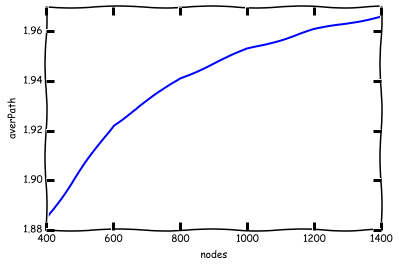

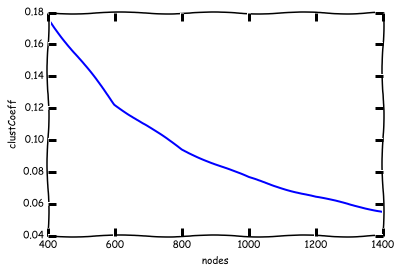

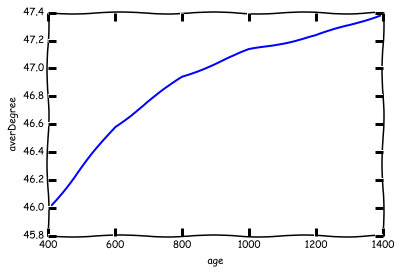

In [59]:
#Модель B
n2min = 400
n2max = 1400
m_per_n = 4
m2_0 = 1600
m2 = 20
tmax = 1000

list_averPath = []
list_clustCoeff = []
list_averDegree = []

for n2 in xrange(n2min, n2max+200, 200):

    G2 = nx.gnm_random_graph(n2,n2*m_per_n)

    list_perebora_modelB = random.sample(xrange(n2),n2)#взяли в рандомном порядке все вершины по 1-ой
    for i in list_perebora_modelB:
        degrees2 = G2.degree()
        temp = sorted(degrees2.items(), key=operator.itemgetter(1)) #в порядке возрастания степеней (т.е. нужны последние m2 вершин)
        for j in xrange(0,m2):
            G2.add_edge(i,temp[-1-j][0])
    
    a,b,c = estimate_parameters(G2)
    list_averPath.append(a)
    list_clustCoeff.append(b)
    list_averDegree.append(c)

plt.figure(1)
nx.draw_networkx(G2,node_size = 1,with_labels = False)

pdf,cdf = estimate_pdf_cdf(G2)
plt.figure(2)
plt.plot(xrange(1,len(pdf)+1), pdf)

plt.figure(3)
plt.plot(xrange(1,len(cdf)+1), cdf)


plt.figure(4)
plt.plot(xrange(n2min,len(G2)+200,200), list_averPath)
plt.xlabel('nodes')
plt.ylabel('averPath')

plt.figure(5)
plt.plot(xrange(n2min,len(G2)+200,200), list_clustCoeff)
plt.xlabel('nodes')
plt.ylabel('clustCoeff')

plt.figure(6)
plt.plot(xrange(n2min,len(G2)+200,200), list_averDegree)
plt.xlabel('age')
plt.ylabel('averDegree')

print('Model B')


We can see, that in model A and model B networks aren't Scale-free networks, that meen that they don't sutisfy power low. It can be explained that this type of model will be Scale-free networks only if model sutisfy both preferentall attachments and growing .

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

**Model C**
<br \>
Lets generate a network, satisfying model C.
Firstly, we take a random graph with n0 nodes and m0 edges. Then we add nodes and edges according to a rule.

As we can see on the figure, in pdf is unusual (but it is difficult to explain why)

As we can see on the pdf and cdf, the network's degree distribution doesn't follows a power law (pdf and cdf don't look like power law distribution).  


Model C


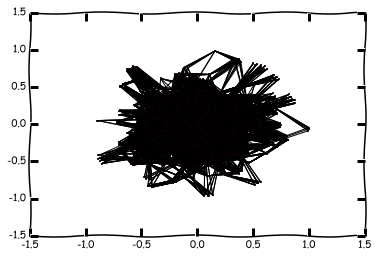

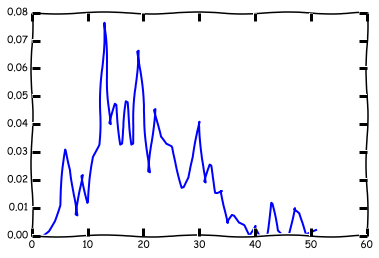

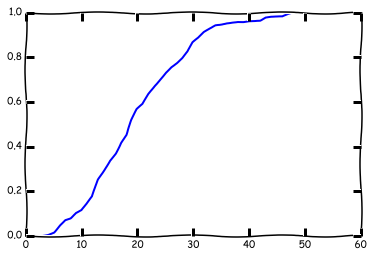

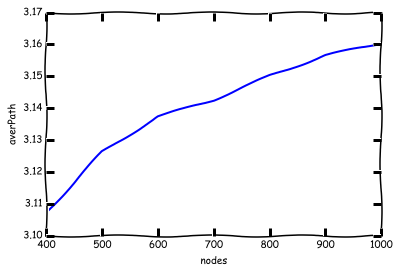

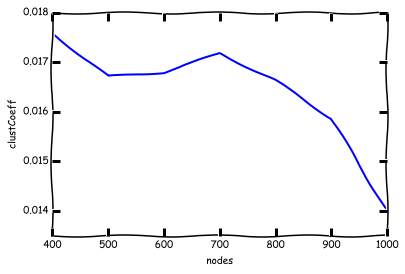

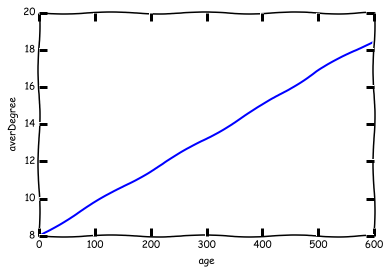

In [77]:
#Модель С
n3 = 400
m3 = 1600
G3 = nx.gnm_random_graph(n3,m3)
tmax3 = 700

list_averPath = []
list_clustCoeff = []
list_averDegree = []

for i in xrange(tmax3):
    randVert = np.random.randint(G3.nodes()[0], G3.nodes()[-1], 1)[0]
    VertNeighboors = G3.neighbors(randVert)
    G3.add_node(len(G3))
    for j in VertNeighboors:
        q=random.random()
        if (q>=0,5):
            G3.add_edge((len(G3)-1),j)
        else: 
            anotherNeigh = np.random.randint(G3.nodes()[0], G3.nodes()[-1],1)[0] 
            G3.add_edge((len(G3)-1), anotherNeigh)
        
    if (i%100 == 0):
        a,b,c = estimate_parameters(G3)
        list_averPath.append(a)
        list_clustCoeff.append(b)
        list_averDegree.append(c)
        

plt.figure(1)
nx.draw_networkx(G3,node_size = 1,with_labels = False)

pdf,cdf = estimate_pdf_cdf(G3)
plt.figure(2)
plt.plot(xrange(1,len(pdf)+1), pdf)

plt.figure(3)
plt.plot(xrange(1,len(cdf)+1), cdf)

plt.figure(4)
plt.plot(xrange(n3,len(G3),100), list_averPath)
plt.xlabel('nodes')
plt.ylabel('averPath')

plt.figure(5)
plt.plot(xrange(n3,len(G3),100), list_clustCoeff)
plt.xlabel('nodes')
plt.ylabel('clustCoeff')

plt.figure(6)
plt.plot(xrange(0,tmax3,100), list_averDegree)
plt.xlabel('age')
plt.ylabel('averDegree')


print('Model C')